In [1]:
import math as mt
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
# function for creating flow grid
def flowgrid (xstart, xend, ystart, yend, N):
    x = np.linspace(xstart,xend,N)
    y = np.linspace(ystart,yend,N)
    X,Y = np.meshgrid(x,y)
    return X,Y

In [3]:
# mesh definition
xstart, xend, ystart, yend, N = -1.0,2.0,-0.5,0.5,51
X,Y = flowgrid(xstart, xend, ystart, yend, N)

In [4]:
# Source Velocity and stream function definition
## functions for velocity and stream function with source or sink
def get_vel(strength, xs, ys, X, Y):
    u = strength/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

def get_streamfun(strength, xs, ys, X, Y):
    psi = strength/(2*np.pi)*np.arctan2((Y-ys),(X-xs))
    return psi

In [17]:
# Parameters for sources
sigma_naca = np.loadtxt ('NACA0012_sigma.txt')
x_naca = np.loadtxt ('NACA0012_x.txt')
y_naca = np.loadtxt ('NACA0012_y.txt')

# Getting velocities and stream functions in a 3D array
U1 = np.ndarray([N, N, np.size(x_naca)],dtype = float)
V1 = np.ndarray([N, N, np.size(x_naca)],dtype = float)
psi1 = np.ndarray([N, N, np.size(x_naca)],dtype = float)
for i in range (0,np.size(x_naca)-1):
    U1[:,:,i],V1[:,:,i] = get_vel (sigma_naca[i],x_naca[i],y_naca[i],X,Y)
    psi1[:,:,i] = get_streamfun (sigma_naca[i],x_naca[i],y_naca[i],X,Y)

In [6]:
# Free stream
u_inf = 1.0
psi_free = u_inf*Y

In [23]:
# Superposing free stream with set of sources
U = u_inf + np.sum(U1, axis=2)
V = np.sum(V1, axis=2)
psi = psi_free + np.sum(psi1, axis=2)

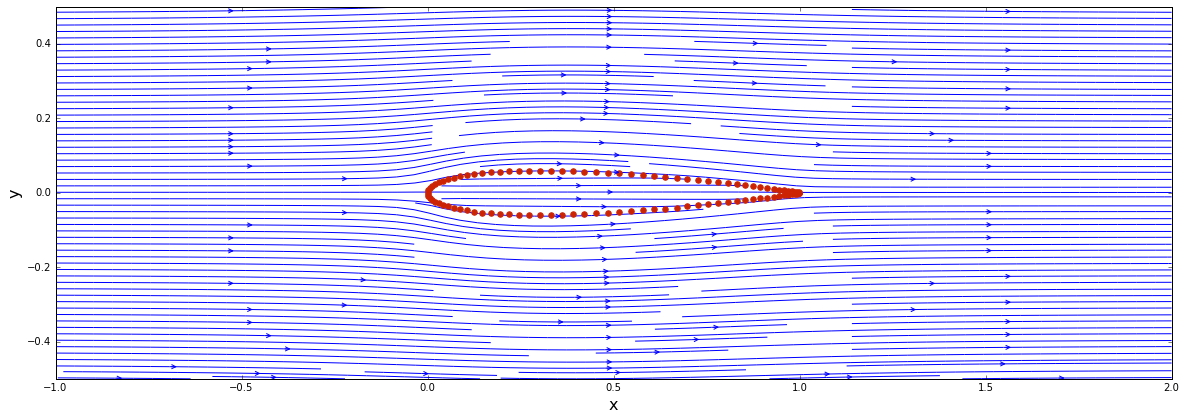

In [25]:
#plot
size = 20
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,U,V, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(x_naca ,y_naca, color = '#CD2305', s=30, marker = 'o')

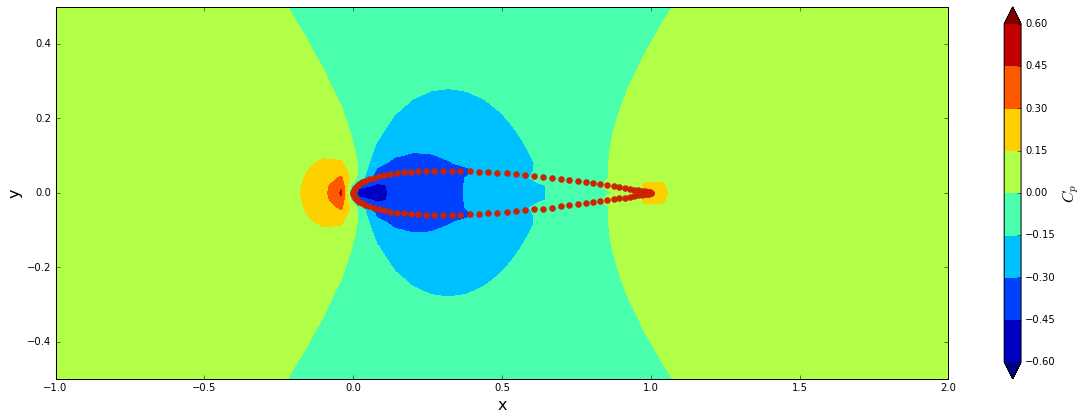

In [29]:
# Pressure Field
cp = 1.0 - (U**2+V**2)/u_inf

# Plotting pressure field
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
contf = py.contourf(X, Y, cp, extend = 'both') 
cbar = py.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
py.scatter(x_naca, y_naca, color = '#CD2305', s=30, marker = 'o')

In [30]:
np.max(cp)

0.4718783751275244

In [33]:
np.where (cp == np.max(cp))

(array([25]), array([16]))